In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import sys
sys.path.append('../src')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📦 Libraries imported successfully")
print("🎯 Starting IMDb dataset exploration...")


📦 Libraries imported successfully
🎯 Starting IMDb dataset exploration...


In [2]:
# Load the IMDb dataset
print("📥 Loading IMDb dataset...")
dataset = load_dataset("imdb")

# Basic dataset information
print(f"✅ Dataset loaded successfully!")
print(f"📊 Training samples: {len(dataset['train']):,}")
print(f"📊 Test samples: {len(dataset['test']):,}")
print(f"📊 Total samples: {len(dataset['train']) + len(dataset['test']):,}")

# Dataset features
print(f"\n🔍 Dataset features: {list(dataset['train'].features.keys())}")
print(f"🎭 Label mapping: {dataset['train'].features['label']}")

# Convert to pandas for easier analysis
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

print(f"\n📋 Train DataFrame shape: {train_df.shape}")
print(f"📋 Test DataFrame shape: {test_df.shape}")


📥 Loading IMDb dataset...
✅ Dataset loaded successfully!
📊 Training samples: 25,000
📊 Test samples: 25,000
📊 Total samples: 50,000

🔍 Dataset features: ['text', 'label']
🎭 Label mapping: ClassLabel(names=['neg', 'pos'], id=None)

📋 Train DataFrame shape: (25000, 2)
📋 Test DataFrame shape: (25000, 2)


🎭 Class Distribution Analysis
Training Set:
  Negative: 12,500 (50.0%)
  Positive: 12,500 (50.0%)

Test Set:
  Negative: 12,500 (50.0%)
  Positive: 12,500 (50.0%)


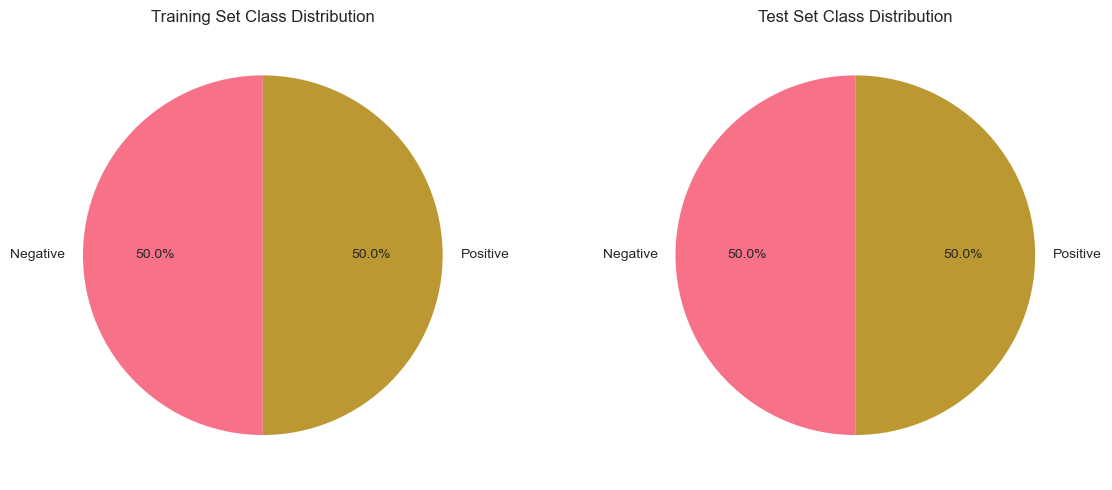

✅ Dataset is perfectly balanced!


In [3]:
# Class distribution analysis
print("🎭 Class Distribution Analysis")
print("=" * 40)

# Train set class distribution
train_counts = train_df['label'].value_counts().sort_index()
test_counts = test_df['label'].value_counts().sort_index()

print("Training Set:")
for label, count in train_counts.items():
    sentiment = "Negative" if label == 0 else "Positive"
    percentage = (count / len(train_df)) * 100
    print(f"  {sentiment}: {count:,} ({percentage:.1f}%)")

print("\nTest Set:")
for label, count in test_counts.items():
    sentiment = "Negative" if label == 0 else "Positive"
    percentage = (count / len(test_df)) * 100
    print(f"  {sentiment}: {count:,} ({percentage:.1f}%)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Train distribution
train_labels = ['Negative', 'Positive']
train_values = [train_counts[0], train_counts[1]]
axes[0].pie(train_values, labels=train_labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Training Set Class Distribution')

# Test distribution
test_values = [test_counts[0], test_counts[1]]
axes[1].pie(test_values, labels=train_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Test Set Class Distribution')

plt.tight_layout()
plt.show()

print("✅ Dataset is perfectly balanced!")


📝 Text Length Analysis
Training Set Statistics:
  Avg characters: 1325.1
  Avg words: 233.8
  Max characters: 13,704
  Max words: 2,470

Test Set Statistics:
  Avg characters: 1293.8
  Avg words: 228.5
  Max characters: 12,988
  Max words: 2,278


C:\Users\sriva\AppData\Local\Temp\ipykernel_24868\2436083521.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(['Negative', 'Positive'])
C:\Users\sriva\AppData\Local\Temp\ipykernel_24868\2436083521.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels(['Negative', 'Positive'])


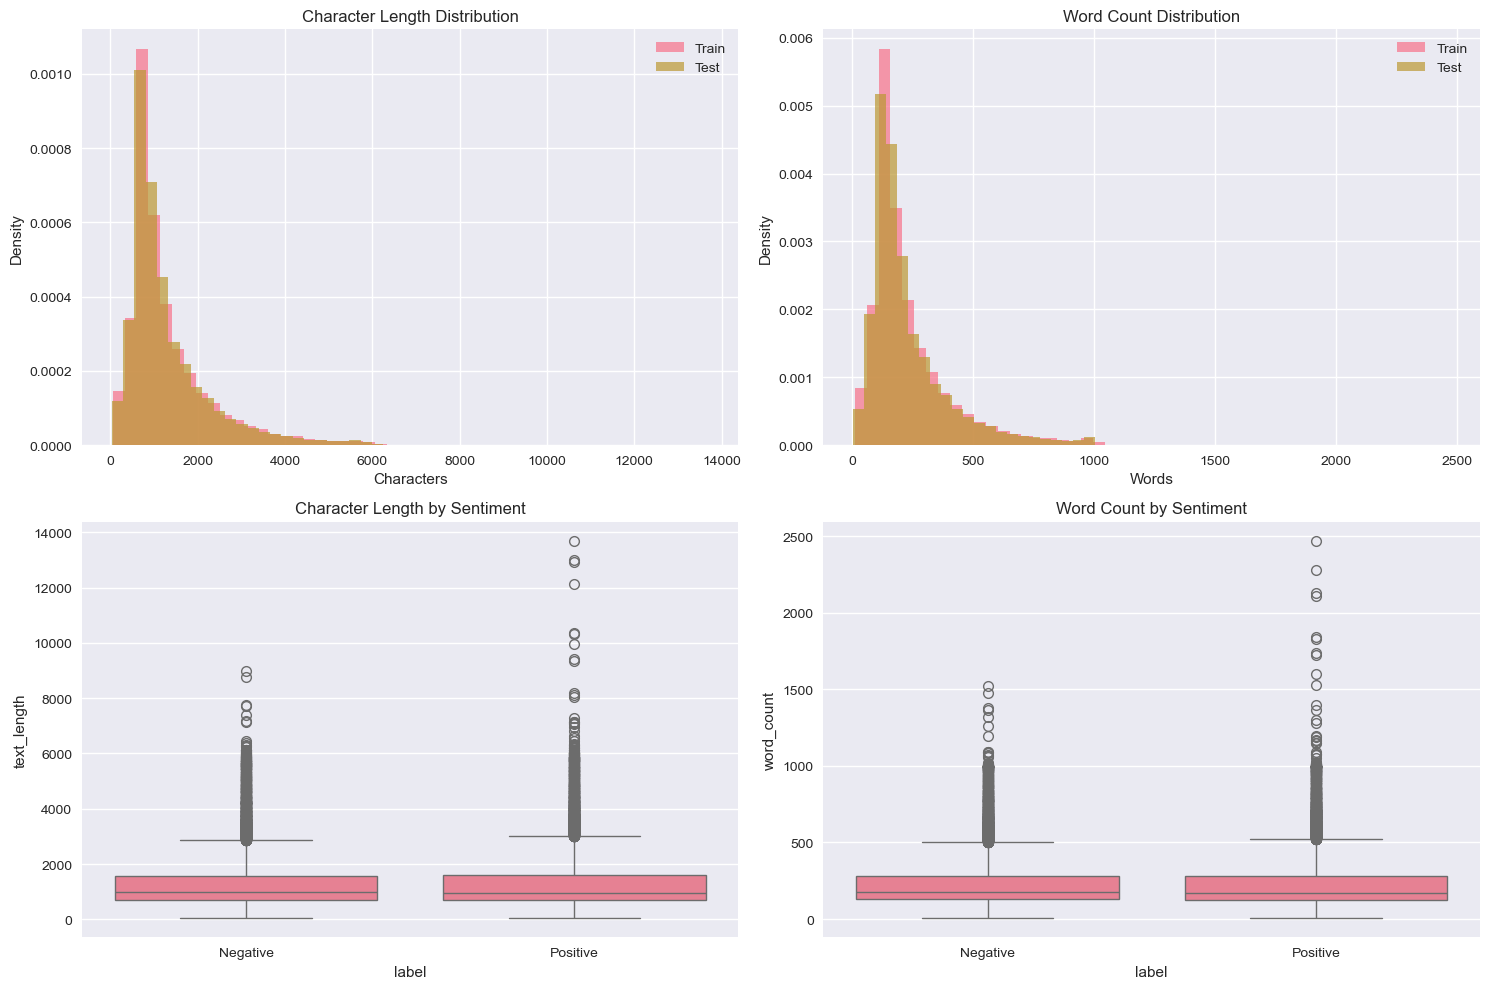

In [4]:
# Text length analysis
print("📝 Text Length Analysis")
print("=" * 40)

# Calculate text lengths
train_df['text_length'] = train_df['text'].str.len()
test_df['text_length'] = test_df['text'].str.len()

train_df['word_count'] = train_df['text'].str.split().str.len()
test_df['word_count'] = test_df['text'].str.split().str.len()

# Statistics
print("Training Set Statistics:")
print(f"  Avg characters: {train_df['text_length'].mean():.1f}")
print(f"  Avg words: {train_df['word_count'].mean():.1f}")
print(f"  Max characters: {train_df['text_length'].max():,}")
print(f"  Max words: {train_df['word_count'].max():,}")

print("\nTest Set Statistics:")
print(f"  Avg characters: {test_df['text_length'].mean():.1f}")
print(f"  Avg words: {test_df['word_count'].mean():.1f}")
print(f"  Max characters: {test_df['text_length'].max():,}")
print(f"  Max words: {test_df['word_count'].max():,}")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Character length distribution
axes[0,0].hist(train_df['text_length'], bins=50, alpha=0.7, label='Train', density=True)
axes[0,0].hist(test_df['text_length'], bins=50, alpha=0.7, label='Test', density=True)
axes[0,0].set_title('Character Length Distribution')
axes[0,0].set_xlabel('Characters')
axes[0,0].set_ylabel('Density')
axes[0,0].legend()

# Word count distribution
axes[0,1].hist(train_df['word_count'], bins=50, alpha=0.7, label='Train', density=True)
axes[0,1].hist(test_df['word_count'], bins=50, alpha=0.7, label='Test', density=True)
axes[0,1].set_title('Word Count Distribution')
axes[0,1].set_xlabel('Words')
axes[0,1].set_ylabel('Density')
axes[0,1].legend()

# Box plots by sentiment
combined_df = pd.concat([
    train_df[['text_length', 'word_count', 'label']],
    test_df[['text_length', 'word_count', 'label']]
])

sns.boxplot(data=combined_df, x='label', y='text_length', ax=axes[1,0])
axes[1,0].set_title('Character Length by Sentiment')
axes[1,0].set_xticklabels(['Negative', 'Positive'])

sns.boxplot(data=combined_df, x='label', y='word_count', ax=axes[1,1])
axes[1,1].set_title('Word Count by Sentiment')
axes[1,1].set_xticklabels(['Negative', 'Positive'])

plt.tight_layout()
plt.show()


In [5]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Load the IMDb dataset
print("Loading IMDb dataset...")
dataset = load_dataset("imdb")

# Basic dataset information
print(f"Training samples: {len(dataset['train'])}")
print(f"Test samples: {len(dataset['test'])}")
print(f"Features: {dataset['train'].features}")

# Convert to pandas for easier analysis
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

print("\nDataset structure:")
print(train_df.head())


Loading IMDb dataset...
Training samples: 25000
Test samples: 25000
Features: {'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['neg', 'pos'], id=None)}

Dataset structure:
                                                text  label
0  I rented I AM CURIOUS-YELLOW from my video sto...      0
1  "I Am Curious: Yellow" is a risible and preten...      0
2  If only to avoid making this type of film in t...      0
3  This film was probably inspired by Godard's Ma...      0
4  Oh, brother...after hearing about this ridicul...      0
